# Comparison between WPM and BPM

In [58]:
from diffractio import plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from matplotlib import cm

In [29]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 1024 * 2)
wavelength = 25 * um

logarithm_drawing = 0

In [30]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

**BPM**

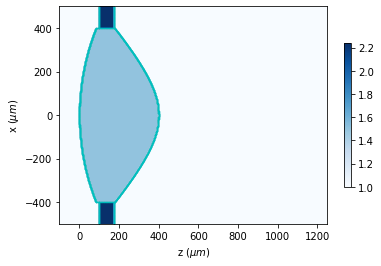

In [31]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
ipasa, conds = lens.aspheric_lens(
    r0=(0 * mm, 0 * mm),
    angle=(0 * degrees, (0 * mm, 0 * mm)),
    refractive_index=1.5,
    cx=(1 / (1 * mm), -1 / (0.25 * mm)),
    Qx=(0, 0),
    a2=(0, 1e-13),
    a3=(0, 0),
    a4=(0, 0),
    depth=0.4 * mm,
    size=0.8 * mm,
)

lens.slit(r0=(0, 100 * um), aperture=800 * um, depth=75 * um, refractive_index=1 + 2j)

lens.draw_refractive_index(draw_borders=True, min_incr=0.01, colorbar_kind="vertical")

In [32]:
lens.smooth_refractive_index(type_filter=2, pixels_filtering=25)

In [33]:
lens.incident_field(u0)

In [34]:
%%time
lens.clear_field()
lens.BPM(verbose=False)

CPU times: user 1.08 s, sys: 157 ms, total: 1.24 s
Wall time: 1.24 s


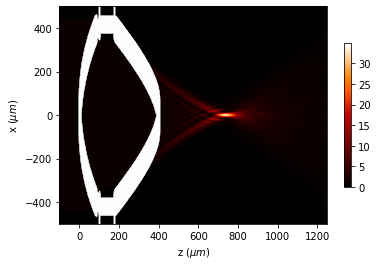

In [35]:
lens.draw(
    kind="intensity",
    logarithm=logarithm_drawing,
    draw_borders=True,
    colorbar_kind="vertical",
)

In [36]:
Intensity_BPM = lens.intensity()

**Focusing area**

In [37]:
x_f_bmp, z_f_bmp = lens.search_focus()

x = -0.122 um, z = 736.908 um


In [38]:
ylim_max = 50 * um
zlim_max = 300 * um

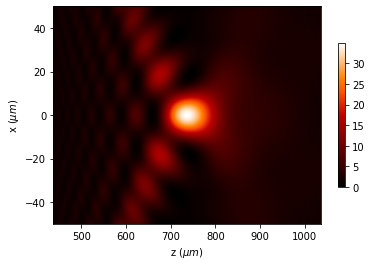

In [39]:
lens.draw(kind="intensity", logarithm=logarithm_drawing, colorbar_kind="vertical")
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_bmp - zlim_max, z_f_bmp + zlim_max)

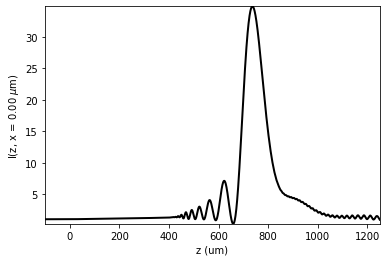

In [40]:
lens.profile_longitudinal(kind="intensity", logarithm=logarithm_drawing, x0=0)

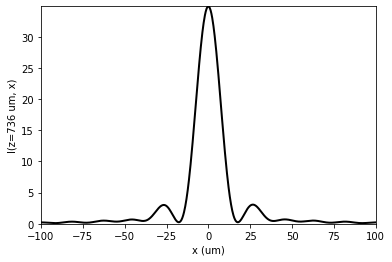

In [41]:
lens.profile_transversal(kind="intensity", logarithm=logarithm_drawing, z0=z_f_bmp)
plt.xlim(-100, 100)

**WPM**

In [42]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

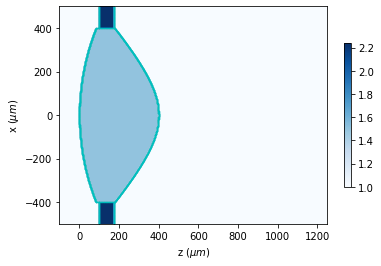

In [43]:
lens2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
ipasa, conds = lens2.aspheric_lens(
    r0=(0 * mm, 0 * mm),
    angle=(0 * degrees, (0 * mm, 0 * mm)),
    refractive_index=1.5,
    cx=(1 / (1 * mm), -1 / (0.25 * mm)),
    Qx=(0, 0),
    a2=(0, 1e-13),
    a3=(0, 0),
    a4=(0, 0),
    depth=0.4 * mm,
    size=0.8 * mm,
)


lens2.slit(r0=(0, 100 * um), aperture=800 * um, depth=75 * um, refractive_index=1 + 2j)
borders = lens.borders


lens2.draw_refractive_index(draw_borders=True, min_incr=0.01, colorbar_kind="vertical")

In [45]:
lens2.incident_field(u0)

In [46]:
lens2.clear_field()
lens2.WPM(verbose=False)

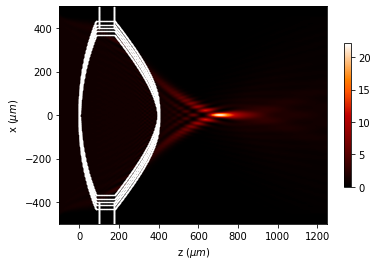

In [47]:
lens2.draw(
    kind="intensity",
    logarithm=logarithm_drawing,
    normalize=None,
    draw_borders=True,
    colorbar_kind="vertical",
)

In [48]:
Intensity_WPM = lens2.intensity()

In [49]:
x_f_wpm, z_f_wpm = lens2.search_focus()

x = -0.122 um, z = 709.209 um


**Focusing area**

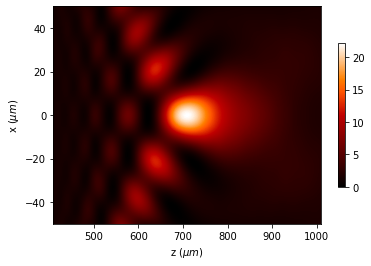

In [50]:
lens2.draw(kind="intensity", logarithm=logarithm_drawing, colorbar_kind="vertical")
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)

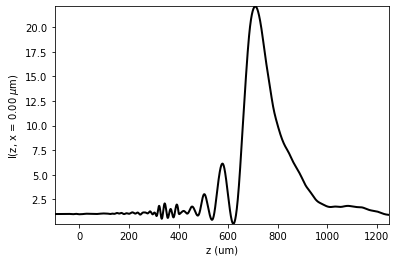

In [51]:
lens2.profile_longitudinal(kind="intensity", logarithm=logarithm_drawing, x0=0)

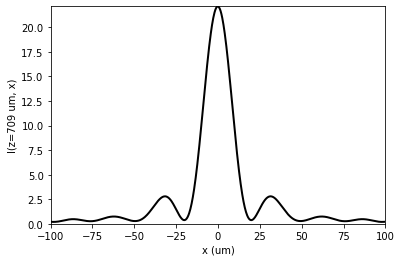

In [52]:
lens2.profile_transversal(kind="intensity", logarithm=logarithm_drawing, z0=z_f_wpm)
plt.xlim(-100, 100)

## Differences

In [53]:
Intensity_diff = (
    Intensity_WPM / Intensity_WPM.max() - Intensity_BPM / Intensity_BPM.max()
)

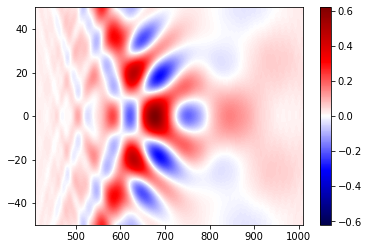

In [59]:
extension = [lens2.z[0], lens2.z[-1], lens2.x[0], lens2.x[-1]]

h1 = plt.imshow(
    Intensity_diff.transpose(),
    interpolation="bilinear",
    aspect="auto",
    origin="lower",
    extent=extension,
)
plt.axis(extension)
h1.set_cmap(cm.seismic)  # OrRd # Reds_r gist_heat

h1.set_clim(-Intensity_diff.max(), Intensity_diff.max())
plt.colorbar(orientation="vertical")
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)

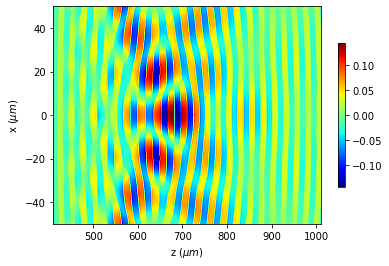

In [28]:
diff = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
diff.u = lens2.u / Intensity_WPM.max() - lens.u / Intensity_BPM.max()

diff.draw(kind="amplitude", logarithm=False, colorbar_kind="vertical")
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)

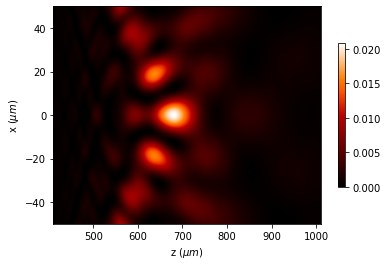

In [29]:
diff.draw(kind="intensity", logarithm=False, colorbar_kind="vertical")
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)

In [30]:
# focal shift

focal_shift = z_f_wpm - z_f_bmp

print("Dz = {:2.2f} um".format(focal_shift))

Dz = -26.38 um
